In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_csv('boston_housing (1).csv')

# Perform T-test for difference in MEDV based on CHAS

t_stat, p_value = stats.ttest_ind(df[df['CHAS'] == 1]['MEDV'],
                                  df[df['CHAS'] == 0]['MEDV'])

print(f"T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")

T-test Results: t-statistic = 3.9964, p-value = 0.0001
There is a significant difference in the median value of houses bounded by the Charles River.


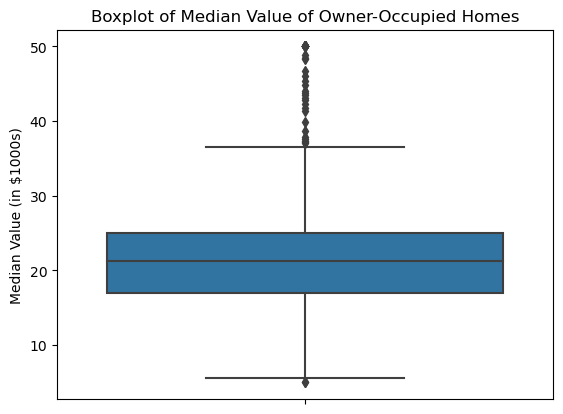

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for MEDV for understanding the data column
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

In [3]:
# 2. ANOVA for difference in MEDV based on AGE
# Discretize AGE into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Perform ANOVA
anova_result = ols('MEDV ~ C(AGE_GROUP)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < 0.05:
    print("There is a significant difference in median values of houses across different age groups.")
else:
    print("There is no significant difference in median values of houses across different age groups.")


                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
There is a significant difference in median values of houses across different age groups.


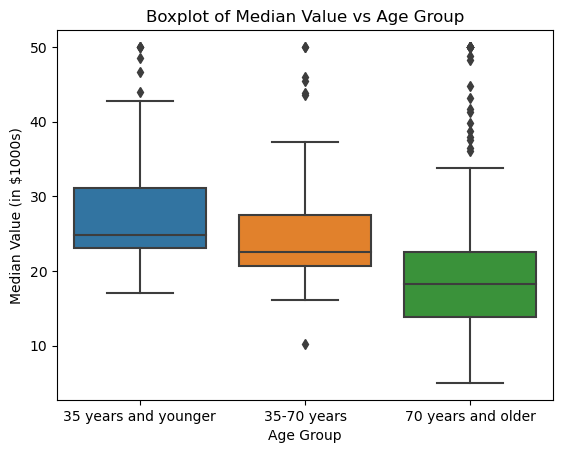

In [4]:
# Boxplot for MEDV vs AGE group
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of Median Value vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

In [5]:
# 3. Pearson Correlation for NOX and INDUS
corr, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print(f"Pearson Correlation Results: correlation = {corr:.4f}, p-value = {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("There is no significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.")


Pearson Correlation Results: correlation = 0.7637, p-value = 0.0000
There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.


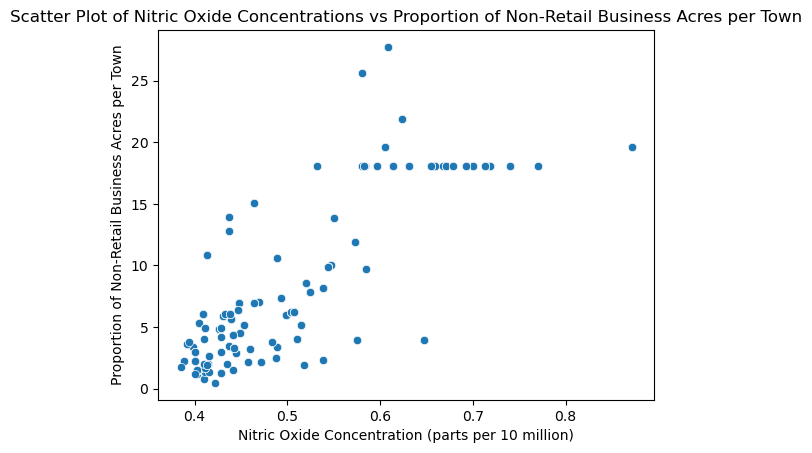

In [6]:
# Scatter plot for NOX vs INDUS
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

In [7]:
# 4. Linear Regression for DIS and MEDV
X = sm.add_constant(df['DIS'])  # Adding a constant
model = sm.OLS(df['MEDV'], X).fit()
print(model.summary())

# Conclusion
if model.pvalues[1] < 0.05:
    print("The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.")
else:
    print("The weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        15:03:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

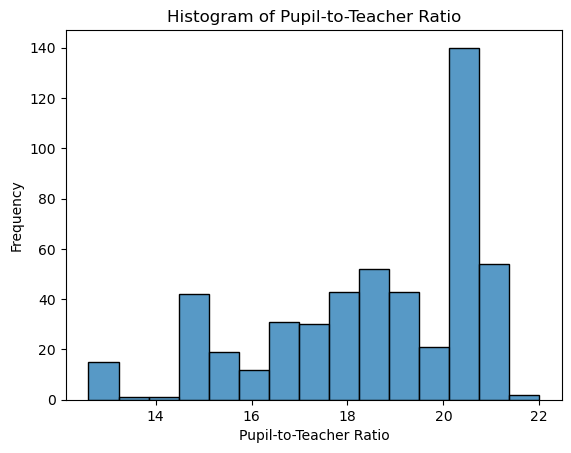

In [8]:
# Histogram for Pupil-to-Teacher Ratio (PTRATIO)
sns.histplot(df['PTRATIO'], bins=15, kde=False)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()
